# [SOC-5] Lecture 18: Inferential Statistics
 
---

![](jupyter-header-1.png)


### Professor David Harding

This notebook focuses on exploring confidence intervals and hypothesis testing. We will do this through exploring the age data of UC Berkeley students and the General Social Survey data with widgets.

---

### Topics Covered
- Sampling Error & Margin of Error
- Law of Large Numbers
- Central Limit Theorem & Normal Distributions
- Confidence Intervals

### Table of Contents

[The Data](#data)<br>

1 - [Sampling Error & Margin of Error](#1)<br>

2 - [Law of Large Numbers](#2)<br>

3 - [Central Limit Theorem & Normal Distributions](#3)<br>

4 - [Confidence Intervals](#4)<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 4.1 - [CI via Resampling](#s1)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 4.2 - [CI with Regression Coefficient](#s2)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 4.3 - [Statistical Testing via CI](#s3)



The code in this notebook is hidden for readability. If you would like to look at the code, click the button below.

<div class="alert alert-warning">
In order to make sure that all of the interactive widgets appear, please click "Kernel" in the top bar, then select "Restart & Run All", then confirm "Restart and Run All Cells". This will hide all of the code cells, but if you want to look at the code come back to the cell below and click the button.
</div>


In [1]:
from IPython.display import HTML

hide_me = ''
HTML('''<script>
code_show=true; 
function code_toggle() {
  if (code_show) {
    $('div.input').each(function(id) {
      el = $(this).find('.cm-variable:first');
      if (id == 0 || el.text() == 'hide_me') {
        $(this).hide();
      }
    });
    $('div.output_prompt').css('opacity', 0);
  } else {
    $('div.input').each(function(id) {
      $(this).show();
    });
    $('div.output_prompt').css('opacity', 1);
  }
  code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input style="opacity:1" type="submit" value="Click here to reveal the raw code."></form>''')

#derived from the style modules notebook (by Keeley Takimoto)

In [2]:
hide_me 
# DEPENDENCIES
# Just run this cell
# This is some code that allows us to manipulate data. You don't need to worry about this now.
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

import warnings
warnings.filterwarnings('ignore')

import numpy as np

import pandas as pd
from scipy import stats
from datascience import *

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

---

## The Data <a id='data'></a>

In this notebook, we will be exploring age data of UC Berkeley students, drawn from the <a href = https://nces.ed.gov/ipeds/use-the-data> National Center for Education Statistics</a>. Additionally, we will continue working with the data from the <a href = https://gss.norc.org> General Social Survey</a>. This notebook utilizes the same GSS data we've used in past notebooks, which include a subset of the variables that were collected. If you are interested in the many other variables the GSS collects, feel free to explore at the link above.

---

# Sampling Error & Margin of Error  <a id='1'></a>

Let's review what sampling error and margin of error are. But first, let's define some statistical terms. 

We consider the *sample statistic* to be a value that we generate from our sample, which is a subset of the population. This can be something like the mean age of a sample of 100 adults who are drawn from the population of all adults. The *population parameter* is a number that is taken to be the true, real value. This would be the mean age of every single adult in the entire human population. In most cases, we don't know the actual value of the population parameter, because it is impossible (or not feasable) to measure every single individual in our population.

**Sampling Error:** The difference between our *sample statistic* and the *population parameter*.

When we take a random sample, we are not guaranteed to get a sample that is perfectly representative of the population. This results in sampling error, since our sample most likely has different attributes than the population as a whole.

**Margin of Error:** A value that helps us quantify the extent to which our *sample statistic* can be different than the *population parameter*. 

For example, say that you took a random sample of UC Berkeley students and asked them how many hours they spent on Facebook each day. Your sample mean could be 1.37 hours, but if you have a margin of error equal to 0.14 at a 95% confidence level, you can be 95% confident that the true number of hours UC Berkeley students spend on Facebook each day (the population parameter) is somewhere between 1.23 and 1.51 hours (1.37 -/+ 0.14). This range of [1.23, 1.51] is known as a *confidence interval*, which we will talk about later in this notebook.

---

Let's apply this knowledge. Say we have the following values:
``` python
sample_stat = 2.73
population_param = 2.68
margin_of_error = 0.1
```

<div class="alert alert-info">
<b> Questions about the above example:</b>  

a) What is the sampling error? 

b) What is the interval in which we are confident that the true population parameter lies (assuming it wasn't just given to us)? 

c) Does our confidence interval with our given margin of error include the true population parameter?
</div>

*Double click this cell to begin typing your answer*

---

# Law of Large Numbers <a id='2'></a>

The **law of large numbers** states that the larger our sample size, the closer our sample statistic will be to the population parameter. Think about it - let's say the entire population is 500 people living in a small town, and the metric you are looking at is the average age. If you select only 1 person for your sample and it happens to be the one 2-year-old, then your sample mean is 2. However, if you select 495 people for your sample, it's much more likely that your sample mean will be closer to the true mean age of everybody in the town.

Let's look at an example with some real world sociological data - the age of UC Berkeley undergrads in Fall 2017! (Note that these data are displayed a little bit differently than the GSS data in prior notebooks. Here we have one row with counts of the number of students in different age groups.)

In [3]:
hide_me 
# The data is given with the number of students in an age range
# For the purposes of this exploration, we'll assume an equal distribution for each age in a range and assign
# an equal number of individuals to each age in the range 
# (if 2 people are in the range 18-19, we'll assume 1 person is 18 and 1 person is 19)
# Because the age range for under 18 and 65 and over is so large, we will exclude those categories from our sample
# We will also round the number of students so that we end up with a whole number of students after separating out for age
ages_df = pd.read_csv('ipeds-berkeley-age-data.csv')
ages_df = ages_df[[x for x in ages_df.columns if 'Grand total' in x]].rename(index = {0:'UC Berkeley'})
ages_df

,Grand total (EF2017B Undergraduate Age under 18),Grand total (EF2017B Undergraduate Age 18-19),Grand total (EF2017B Undergraduate Age 20-21),Grand total (EF2017B Undergraduate Age 22-24),Grand total (EF2017B Undergraduate Age 25-29),Grand total (EF2017B Undergraduate Age 30-34),Grand total (EF2017B Undergraduate Age 35-39),Grand total (EF2017B Undergraduate Age 40-49),Grand total (EF2017B Undergraduate Age 50-64),Grand total (EF2017B Undergraduate Age 65 and over),Grand total (EF2017B Undergraduate Age unknown)
UC Berkeley,651,12040,12434,3762,1091,311,143,89,48,5,NaN


In [4]:
hide_me 
# create an array that roughly consists of the age of each student, following rules defined in cell above
repeats = [ages_df.iloc[0][1]/2, ages_df.iloc[0][1]/2, ages_df.iloc[0][2]/2, ages_df.iloc[0][2]/2,
           ages_df.iloc[0][3]/3, ages_df.iloc[0][3]/3, ages_df.iloc[0][3]/3,
           (ages_df.iloc[0][4]-1)/5, (ages_df.iloc[0][4]-1)/5, (ages_df.iloc[0][4]-1)/5, 
           (ages_df.iloc[0][4]-1)/5, (ages_df.iloc[0][4]-1)/5, (ages_df.iloc[0][5]-1)/5,
           (ages_df.iloc[0][5]-1)/5, (ages_df.iloc[0][5]-1)/5, (ages_df.iloc[0][5]-1)/5, 
           (ages_df.iloc[0][5]-1)/5, (ages_df.iloc[0][6]+2)/5, (ages_df.iloc[0][6]+2)/5, 
           (ages_df.iloc[0][6]+2)/5, (ages_df.iloc[0][6]+2)/5, (ages_df.iloc[0][6]+2)/5,
           9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
ages = np.arange(18, 65)

all_ages = np.repeat(ages, repeats)
total = len(all_ages) 
print('The total number of individuals in our dataset is', total, 'ignoring those under 18 and over 65.')

The total number of individuals in our dataset is 29916 ignoring those under 18 and over 65.


We'll treat that as the population. Let's take a small sample of two individuals from our dataset and see what the average age is. 

In [5]:
hide_me 
np.random.seed(6044) # magic! choose a random seed that gets values you want
small_sample = np.random.choice(all_ages, 2)

print("Our sample:", small_sample)
print("Mean:", np.mean(small_sample))

Our sample: [57 42]
Mean: 49.5


In [6]:
hide_me 
# We'll be doing a lot of plotting and sampling, so we'll define some functions to help us.
def sample_ages(n, r = 1):
    """Take a random sample of size n from the array of student ages."""
    np.random.seed(r) # allow for different samples when iterating many times
    return np.random.choice(all_ages, n)

def plot_ages(sample):
    """Creates a histogram of the values in the sample."""
    plt.hist(sample, 65, range=[17, 65])
    plt.axvline(np.mean(sample), c='red')
    plt.title('Distribution of Ages for ' + str(len(sample)) + ' Students')
    plt.xlabel('Age')
    plt.ylabel('Frequency');
    
def plot_two_sample_means_ages(sample_1, sample_2):
    """Creates a histogram of the means of the given two samples."""
    plt.hist([np.mean(sample_1), np.mean(sample_2)], 30, range=[18, 22])
    plt.title('Distribution of Sample Means for 2 Samples')
    plt.xlabel('Age')
    plt.ylabel('Frequency');

def plot_many_sample_means_ages(n):
    """Creates n samples, where each sample consists of a simulated population of students.
    Plots the distribution of the sample means for the n samples."""
    sample_means = np.array([])
    for i in range(n):
        np.random.seed(i)
        sample = np.random.choice(all_ages, n)
        sample_means = np.append(sample_means, np.mean(sample))
        
    plt.hist(sample_means, 50, range=[19, 22])
#     plt.axvline(x=np.mean(sample_means), c='red') # a line for the mean of all the means
    plt.title('Distribution of Sample Means for ' + str(n) + ' samples')
    plt.xlabel('Sample Mean')
    plt.ylabel('Frequency');

Below we take a look at the distribution of our small sample, with a red line for the sample mean.

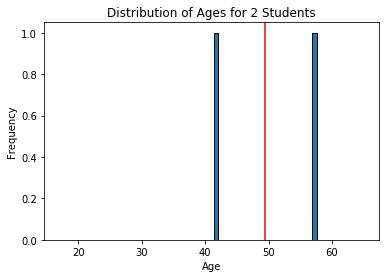

In [7]:
hide_me 
plot_ages(small_sample)

Let's create a larger sample so that we can see how the distribution and mean changes. We'll simulate choosing a sample of 500 students.

In [8]:
hide_me 
np.random.seed(6044) # Choose a random seed for consistency
large_sample = np.random.choice(all_ages, 500)
print("Large sample of 500 students")
print("Mean:", np.mean(large_sample))

Large sample of 500 students
Mean: 20.786


As we can see, the calculated mean of our large sample appears much closer what we would expect for the average age of college students than the mean we got for our sample of 2 students. Let's visualize the distribution of our large sample. Again, the red line shows the sample mean for our large sample.

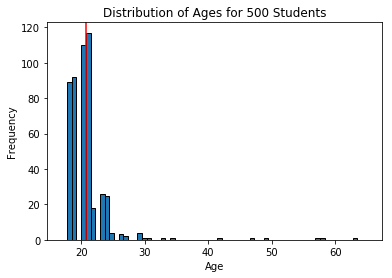

In [9]:
hide_me 
plot_ages(large_sample)

<div class="alert alert-info">
<b> Question:</b>  What do you notice about the overall distribution of the large sample versus the small sample? What effect did sample size have on the mean of the sample?
</div>

*Double click this cell to begin typing your answer*

# Central Limit Theorem <a id='3'></a>
The central limit theorem tells us that the distribution of sample means approximates a normal distribution as the sample size (n) increases. Let's unpack what that means. 

Suppose we have a population, and we take many many large random samples (statisticians usually say large is n>30, but this can vary). The CLT says that if we take the sample mean of the first sample, the sample mean of the second sample, and so on for every sample, then plot the distribution of all of the means, the resulting distribution should look like a normal distribution. Sometimes the mean will be high, sometimes the sample mean will be low, and a majority of the time the mean will be somewhat close to the population mean. This is why we say that the distribution of sample means approximates a normal distribution that is centered around the population mean. Recall that oftentimes we don't know the true value of the population mean - this is why having sample means centered around a value is useful!

We will head back to our student ages example to visualize the Central Limit Theorem in action. 

Below, we create two different samples of size 50. This satisfies the requirement that our samples must be large. We will then compare the sample means of the two samples.

In [10]:
hide_me 
sample_1 = sample_ages(50)
sample_2 = sample_ages(50, r=19) # the extra argument ensures the 2nd sample is different from the first
print("Mean of Sample 1: ", np.mean(sample_1))
print("Mean of Sample 2: ", np.mean(sample_2))

Mean of Sample 1:  20.56
Mean of Sample 2:  19.96


Let's take a look at a plot of the sample means.

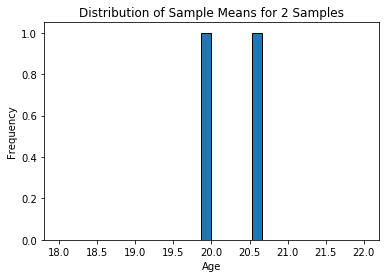

In [11]:
plot_two_sample_means_ages(sample_1, sample_2)

<div class="alert alert-info">
<b> Question:</b>  What do you notice about the distribution of the two sample means?
</div>

*Double click this cell to begin typing your answer*

Let's see what happens when we use 30 samples instead.

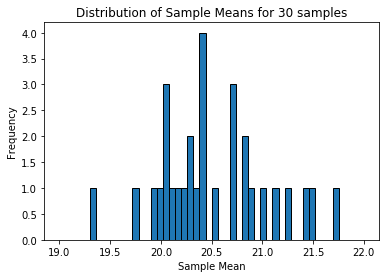

In [12]:
hide_me 
plot_many_sample_means_ages(30)

We can see that we are getting closer to something resembling a normal distribution. Let's go up one more time to running our method with 500 samples.

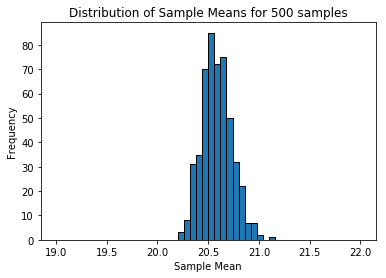

In [13]:
hide_me 
plot_many_sample_means_ages(500)

<div class="alert alert-info">
<b> Question:</b>  What do you notice about the histogram for 500 sample means compared to the histogram for 30 sample means? What can you say about the standard deviation of the distribution of 500 sample means compared to the standard deviation of the distribution with 30 sample means?
</div>

*Double click this cell to begin typing your answer*

Below, we have a widget which allows you to adjust the number of samples you are taking. Try adjusting the slider and notice how the histogram changes!

<div class="alert alert-warning">
Make sure to run the cell below to use the interactive widget.
</div>

In [14]:
hide_me 
interact(plot_many_sample_means_ages, n=widgets.IntSlider(min=0, max=1500, step=50, value=500));

interactive(children=(IntSlider(value=500, description='n', max=1500, step=50), Output()), _dom_classes=('widg…

# A Note on Normal Distributions

You may be wondering why it's significant that as we increase the number of samples we take, the distribution of sample means approches a normal distribution. A normal distribution has several special properties, as illustrated by the image below.


<img src="normal-curve.JPG" width="500"/>

<center> <b>Figure 1</b>. Normal Distribution. <a href = https://www.syncfusion.com/ebooks/statistics/normal-distribution> [Source]</a>

Normal distributions have the property that approximately 68% of values lie within 1 standard deviation (represented as $\sigma$) of the mean (represented as $\mu$), approximately 95% of values are within 2 standard deviations, and 99.7% of values lie within 3 standard deviations of the mean.

Knowing this about normal distributions, and having a distribution of sample means that approximate a normal distribution, we are able to come to conclusions with a certain amount of confidence about what we think the population parameter is. This brings us to confidence intervals, which we discuss next. 

# Confidence Intervals<a id='4'></a>

Using what we know about normal distributions, we can come up with confidence intervals. A **confidence interval** is an interval based on the sample statistic, which we are confident that the true population parameter falls into. For each confidence interval, we also have a **confidence level**. The confidence level tells us how confident we are that the population parameter is actually within our confidence interval.

Heading back to our student ages example, if we want to be very confident that the population parameter falls within our confidence interval, we are going to have to make our confidence interval wide. The wider our confidence interval is, the more confident we are. Think about it like this - if the youngest student is 15 and the oldest student is 68 and we want to be 100% confident that the true average age is within our interval, we can set our interval as [15, 68]. This interval contains all possible values, so the average age of everyone in the population must be within the interval. While this lets us be confident in our answer, it doesn't really let us draw any conclusions. When our confidence level is lower, our interval will be narrower. If we are only 60% sure that the true mean is within our confidence interval, our interval may look something like $[20.87, 21.03]$.

### Calculating Confidence Intervals

Recall that we said a normal distribution contains approximately 95% of values within 2 standard deviations of the mean. Using this, we can create a 95% confidence interval by taking the average of the sample means, calculating the standard deviation of the sample means, and using those values to figure out the values 2SD below the mean and 2SD above the mean. Thus, our 95% confidence interval would be [$\mu - 2\sigma$, $\mu + 2\sigma$] ($\mu$ is the mean and $\sigma$ is the standard deviation).

What happens when we are using a real life dataset and have a large target population, such as all the entire US population? It's very hard to get 500 large samples of real live people, especially when these large samples should have at least 30 people each. That's at least 1500 people, which would take a lot of time and resources to survey! There are two ways to solve this problem. One is to estimate the standard deviation of the distribution of sample means from the one sample we have based on the standard deviation of the cases in that one sample, using a formula and some assumptions (if you have taken an introductory statistics course before, this is probably what you learned). The other option, which we can do these days due to advances in computing power, is something called **resampling** which we will explore in the section below.

## Confidence Intervals via Resampling<a id='s1'></a>

Recall that in the last two notebooks we worked with the GSS data. In this case, we only have one sample of individuals per year! So how can we create a confidence interval when we only have 1 sample?

We do this through a technique called **resampling**. Resampling is when we use our sample to generate more samples, so that we can calculate things like confidence intervals. The process of resampling involves taking a random sample from our current sample, with replacement. Sampling with replacement means that after we sample a case, we put it back in the pool again so that it could be sampled again (and again). (In contrast, sampling *without* replacement means each case can be sampled only once). Taking a sample *with* replacement is necessary, since when we resample we use the same sample size of the original sample. If we sampled *without* replacement we would always just end up with the original sample every time we sampled from it.  

As an example, suppose we have a sample of 30 Americans who took our survey. We want to create multiple samples from our 30 respondents, so we decide to resample. For consistency, all of our resamples should be the **same** size as the original sample. However, what happens if we take a sample of 30 from our 30 respondents, without replacement? We end up with the same group of individuals! They may be sampled in a different order, but when we are calculating statistics the order doesn't matter. For this reason, we **sample with replacement**. Yes, that means that some people from our original sample will show up multiple times in our resample, but our hope is that this is representative of the whole population (where it's possible multiple people can give the same answers).

<div class="alert alert-info">
<b> Question:</b>  Why do we sample with replacement when generating resamples?
</div>

*Double click this cell to begin typing your answer*

Let's take a look at the GSS data and see how we can generate a confidence interval via resampling. For simplicity, we'll focus on the data from 2018. Below the first 5 rows of the data are displayed.

In [15]:
hide_me 
gss = pd.read_csv('cleaned_data.csv')
gss = gss[gss['YEAR'] == 2018]
gss = gss.replace({-1:np.nan})
gss.head()

,Unnamed: 0,YEAR,REALINC ($),TVHOURS,POLHITOK,CLASS,HAPPY,VISIONS,ESP,DEJAVU,REGION,RACE,DEGREE,EDUC,CHILDS,SIBS,HRS1,REALRINC
62466,62466,2018,0.0000,3.0,Not applicable,Working class,Pretty happy,Not applicable,Not applicable,Not applicable,New england,White,Junior college,14.0,0.0,4.0,NaN,0.0
62467,62467,2018,14755.0000,NaN,No,Working class,Very happy,Not applicable,Not applicable,Not applicable,New england,White,High school,10.0,3.0,4.0,NaN,0.0
62468,62468,2018,72640.0000,1.0,No,Middle class,Very happy,Not applicable,Not applicable,Not applicable,New england,White,Bachelor,16.0,2.0,2.0,40.0,45400.0
62469,62469,2018,119879.4173,1.0,Yes,Middle class,Very happy,Not applicable,Not applicable,Not applicable,New england,White,Bachelor,16.0,2.0,3.0,40.0,54480.0
62470,62470,2018,119879.4173,NaN,Yes,Upper class,Pretty happy,Not applicable,Not applicable,Not applicable,New england,Black,Graduate,18.0,0.0,3.0,NaN,0.0


In [16]:
hide_me 
avg_educ = np.round(np.mean(gss['EDUC']), 2)
print("Average years of education: ", avg_educ)

Average years of education:  13.73


In [17]:
hide_me 
# prevent hardcoding in markdown if values or data changes
print("For 2018")
print("Sample Size:", gss.shape[0])
print("Average Education (years):", avg_educ)

For 2018
Sample Size: 2348
Average Education (years): 13.73


In 2018, we had more than 2000 individuals complete the survey, with an average education of just under 14 years. This roughly corresponds to the fact that the average American in 2018 completed just under 2 years of higher education. However, this is just a sample statistic, and we are interested in what the true population parameter is - this is where resampling and confidence intervals come in. Let's create one resample and see how it differs from our original sample.

In [18]:
hide_me 
np.random.seed(24)
resample1 = np.random.choice(gss['EDUC'], 2348)
print("Mean of one resample: ", np.round(np.nanmean(resample1),2))

Mean of one resample:  13.88


We can see that by taking 1 resample, we get an average education that is a little bit higher than our original calculation for average years of education.

<div class="alert alert-info">
<b> Question:</b>  What do you think will happen to the distribution of sample means as we take more and more resamples?
</div>

*Double click this cell to begin typing your answer*

Recall from the first lecture that in the GSS data we have the following numeric (interval or ratio) variables:

|Variable   | Description |
|--------------|---------|
|REALINC ($) | Family income  |
|TVHOURS | Hours per day watching TV |
|EDUC |  Highest year of school completed|
|CHILDS |  Number of children|
|SIBS |  Number of brothers and sisters|
|HRS1 | Number of hours worked last week|
|REALRINC |  Respondent's income|

The widget below lets you interact with the 2018 GSS data and a few of the numerical variables. Pay attention to how the confidence interval and the graph change as you switch between variables and sample sizes. The confidence interval is the middle 95 percent of sample means from the distribution of sample means created. It is calculated as described above, using the mean and standard deviation of the sample means. 

<div class="alert alert-warning">
Make sure to run the cell below to use the interactive widget.
</div

In [19]:
hide_me 
def ci_95(data):
    """Generates a 95% confidence interval for the given data. Data should be an array."""
    n = len(data)
    sd = np.nanstd(data)
    m = np.nanmean(data)
    return (np.round(m - 2*sd, 2), np.round(m + 2*sd, 2))

In [20]:
hide_me 
def gss_plot_resample_means(n, column):
    """Creates n resamples from the given column of the GSS data. 
        n: int, number of resamples
        column: str, column name for GSS variable to explore"""
    resample_means = np.array([])
    for i in range(n):
        np.random.seed(i)
        sample = np.random.choice(gss[column], len(gss[column]))
        resample_means = np.append(resample_means, np.nanmean(sample))
    sns.distplot(resample_means, bins=30)
    plt.axvline(x = np.nanmean(gss[column]), c='red')
    plt.xlabel('Sample Means')
    plt.ylabel('Frequency')
    plt.title('Distribution of Sample Means for 2018 ' + column + ', ' + str(n) + ' resamples')
    ci = ci_95(resample_means)
    print('95% Confidence Interval: ', ci)

In [21]:
hide_me 
warnings.filterwarnings('ignore') # this is to hide a warning that an argument name is deprecated
variable_buttons = widgets.ToggleButtons(options=["REALINC ($)", "TVHOURS", "EDUC", 
                                                  "CHILDS", "SIBS", "HRS1", "REALRINC"],
                         value="EDUC")
interact(gss_plot_resample_means, n=widgets.IntSlider(min=0, max=1500, step=50, value=500),
         column = variable_buttons);

interactive(children=(IntSlider(value=500, description='n', max=1500, step=50), ToggleButtons(description='col…

<div class="alert alert-info">
<b> Question:</b>  How does the size of the confidence interval change as you increase or decrease the sample size for a particular variable?
</div>

*Double click this cell to begin typing your answer*

## Confidence Intervals with Regression Coefficient<a id='s2'></a>
Confidence intervals are a useful tool to see how one statistic may change over multiple samples. However, what if we want to look at the relationship between two variables? How can we use the power of confidence intervals in this scenario?

Recall from Lecture 17 that a **regression line** shows us the relationship between two variables, and we can draw conclusions on this relationship based on the sign and magnitude of the slope of the regression line. Recall also that the slope is the number of units that the dependent variable (Y) changes when the independent variable (X) changes by 1 unit. In the widget below, we will look at an example in which Y is family income (REALINC) and X is years of education (EDUC). The slope in that example tells us the change in family income (in dollars) associated with one additional year of education.  

We can also create a confidence interval for the slope, so we can get a sense of how much sampling error there might be in our one estimate of the slope. 

Let's take a look at an example from the GSS. Pretend that we consider the GSS data our "population" (in reality, the GSS data is a sample of the true population - all adults in America). Taking several samples from our population of GSS respondents will allow us to see how the regression line changes with different samples. We have 2,348 respondents in our population, so we will create many samples of size 100. **Remember that this is different than resampling** - in resampling, we'd be taking samples that also have 2,348 individuals - we'll talk about this shortly.

Below, there is a widget that allows you to see how the regression line changes with multiple samples. Play with it and see if you can build some intuition about how it may change across many resamples of the same population.

<div class="alert alert-warning">
Make sure to run the cells below to use the interactive widget.
</div

In [22]:
hide_me 
def gss_sample(num, rand):
    """Create num resamples from the GSS dataset."""
    sample = gss.sample(n = num, replace = True, random_state = rand)
    return sample

In [23]:
def gss_plot_samples_regression(num_samples, x_col, y_col, sample_size):
    """Generate a regression line for each of num_samples samples, and plot the lines and points of each sample.
        Additionally display the confidence interval for the slope of the regression line."""
    slopes = np.array([])
    for i in range(num_samples):
        sample = gss_sample(sample_size, i)
        slope, intercept, r, p, se = stats.linregress(sample[x_col],sample[y_col])
        slopes = np.append(slopes, slope)
        line = [slope*x + intercept for x in sample[x_col]]
        plt.scatter(x = sample[x_col], y = sample[y_col], s = 2)
        plt.plot(sample[x_col], line)
        plt.xlabel(x_col)
        plt.ylabel(y_col)
    plt.title(x_col + ' by ' + y_col + ' over ' + str(num_samples) + ' resamples, samples of size ' + str(sample_size))
    ci_slopes = ci_95(slopes)
    print('95% Confidence Interval for Slope: ', ci_slopes)

In [24]:
interact(gss_plot_samples_regression, sample_size =widgets.IntSlider(min=0, max=350, step=50, value=100),
         num_samples=widgets.IntSlider(min=0, max=10, step=1, value=3),
         x_col = fixed('EDUC'), y_col = fixed('REALINC ($)'));

interactive(children=(IntSlider(value=3, description='num_samples', max=10), IntSlider(value=100, description=…

<div class="alert alert-info">
<b> Question:</b>  What happens to the relationship between EDUC and REALINC ($) as you increase the number of samples you are taking? What happens when you increase the sample size of each of the samples?
</div>

*Double click this cell to begin typing your answer*

## Statistical Testing via Confidence Intervals <a id='s3'></a>

In many of the examples above when you set the widget to display the relationship between different variables, you can see a generally positive or negative slope. Before, we created a confidence interval for sample means, so that we could gain confidence in the true average of the population. Now, we are interested in the true relationships between different variables in our dataset. With the same resampling methodology as before, we can create a confidence interval for the slope of the line for the relationship between two variables.

However, if we create a confidence interval that tells us our slope is between [-1, 3], does this really let us draw any conclusions? We are saying that we're confident that the slope is *either* positive or negative. So which is it? We don't know!

When we do a statistical test based on a confidence interval, we must be wary of our confidence interval containing the value 0. For example, if we are looking at the relationship between years of education and family income, and our confidence interval for the slope of the regression line includes 0, then we can't draw any conclusions on the true relationship. The data are consistent with a true population slope that is negative, zero, or positive. 

<div class="alert alert-info">
<b> Question:</b>  What conclusions can we draw when our confidence interval for the slope of a regression line includes 0?
</div>

*Double click this cell to begin typing your answer*

As we saw before, we can create confidence intervals for metrics such as mean or slope for the relationship between two variables. This leads us into statistical testing, where we can create a null hypothesis and an alternative hypothesis and use our confidence interval to decide whether our findings are *statistically* significant! Below we have again the widget which shows the confidence interval for the slope for years of education (X) and number of children (Y). (This widget only works correctly for sample sizes of 50 and 100, even though it is possible to set the sample size to other values.)


<div class="alert alert-warning">
Make sure to run the cells below to use the interactive widget.
</div

In [25]:
interact(gss_plot_samples_regression, sample_size =widgets.IntSlider(min=0, max=250, step=50, value=100),
         num_samples=widgets.IntSlider(min=0, max=15, step=1, value=3),
         x_col = fixed('EDUC'), y_col = fixed('CHILDS'));

interactive(children=(IntSlider(value=3, description='num_samples', max=15), IntSlider(value=100, description=…

Say that we create a null hypothesis that the true population parameter for the slope of the relationship between number of years of education and number of children is 0, meaning there is *no* association between years of education and number of children. Our alternative hypothesis states that the true population parameter for the slope of the education-children relationship is not 0 (i.e. there *is* a relationship). When we generate a 95% confidence interval, if 0 is in that interval, then we "fail to reject" the null hypothesis, meaning the data are consistent with the slope of 0 specified by the null hypothesis. If 0 is not in the interval, then we'll "reject" the null hypothesis and can conclude that the slope is something other than zero.

<div class="alert alert-info">
<b> Question:</b>  Based on the confidence interval provided by the widget above, do we reject or fail to reject the null hypothesis? What does that mean? Does your answer depend on whether you have chosen a sample size of 50 or 100? Why?
</div>

*Double click this cell to begin typing your answer*

---

## Bibliography

- Syncfusion - Image of Normal Distributions. https://www.syncfusion.com/ebooks/statistics/normal-distribution
- National Center for Education Statistics: Postsecondary Education Data System (IPEDS) - Age demographics of UC Berkeley students. https://nces.ed.gov/ipeds/use-the-data

---
Notebook developed by: Keilyn Yuzuki

Data Science Modules: http://data.berkeley.edu/education/modules
